#inputs and cleanup

In [22]:
import os
import pandas as pd
from matplotlib import pyplot as plt

data taken from https://www.kaggle.com/datasets/mandygu/lingspam-dataset

In [23]:
df = pd.read_csv('messages.csv', sep=',')
df

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


In [318]:
df.isnull().sum()

,0
subject,62
message,0
label,0


In [276]:
len(df[(pd.isna(df['subject']))&(df['label'] == 1)])

13

In [277]:
len(df[(pd.isna(df['subject']))&(df['label'] == 0)])

49

fill in with first word of the message and add full text column

In [24]:
df['subject'] = df['subject'].fillna(df['message'].str.split().str[0])
df['text'] = df['subject'] + df['message']

In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.1/239.1 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.7/939.7 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.1 MB/s eta 0:00:00


In [28]:
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import textstat
import pandas as pd
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet as wn
import re

nlp = spacy.load("en_core_web_sm")

nltk.download('punkt')
nltk.download('punkt_tab')

nltk.download('wordnet')
nltk.download('omw-1.4')

def lexical_diversity(text):
    tokens = word_tokenize(text.lower())
    words = [word for word in tokens if word.isalpha()]
    return len(set(words)) / len(words) if words else 0

def avg_sentence_length(text):
    doc = nlp(text)
    sentences = list(doc.sents)
    return sum(len(sent) for sent in sentences) / len(sentences) if sentences else 0

def avg_wordnet_depth(text):
    tokens = word_tokenize(text.lower())
    words = [word for word in tokens if word.isalpha()]
    depths = []

    for word in words:
        synsets = wn.synsets(word)
        synset_depths = [syn.min_depth() for syn in synsets]
        if synset_depths:
            depths.append(sum(synset_depths) / len(synset_depths))

    return sum(depths) / len(depths) if depths else 0

stop = stopwords.words('english')

#prep
df['text'] = df['text'].str.lower().apply(lambda x: re.sub(r'[^a-z\s]', '', x))

df['tokenized_text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# df['len'] = df['tokenized_text'].apply(len)

df['flesch_reading_ease'] = df['tokenized_text'].apply(textstat.flesch_reading_ease)
# df['flesch_kincaid_grade'] = df['tokenized_text'].apply(textstat.flesch_kincaid_grade)
# df['lexical_diversity'] = df['tokenized_text'].apply(lexical_diversity)
df['avg_sentence_length'] = df['tokenized_text'].apply(avg_sentence_length)
df['avg_wordnet_depth'] = df['tokenized_text'].apply(avg_wordnet_depth)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


removed len, flesch_kincaid_grade and lexical_diversity as they correlated with coefficient 1 and 0.8

In [29]:
df = df.drop(columns=['subject', 'message'])

In [30]:
df

,label,text,tokenized_text,flesch_reading_ease,avg_sentence_length,avg_wordnet_depth
0,0,job posting appleiss research centercontent ...,job posting appleiss research centercontent le...,-242.953678,242.0,4.705083
1,0,langlang classification grimes joseph e and ...,langlang classification grimes joseph e barbar...,-161.432544,169.0,5.032788
2,0,query letter frequencies for text identificat...,query letter frequencies text identificationi ...,-107.213806,134.0,4.229213
3,0,riska colleague and i are researching the diff...,riska colleague researching differing degrees ...,16.951724,29.0,3.114399
4,0,request book informationearlier this morning i...,request book informationearlier morning phone ...,-41.295484,46.5,4.303602
...,...,...,...,...,...,...
2888,1,love your profile ysuolvpvhello thanks for st...,love profile ysuolvpvhello thanks stopping tak...,56.252000,25.0,3.501686
2889,1,you have been asked to join kiddinthe list own...,asked join kiddinthe list owner kiddin invited...,-125.919836,183.0,4.020891
2890,0,anglicization of composers namesjudging from ...,anglicization composers namesjudging return po...,-52.700000,89.0,3.771289
2891,0,re comparative method n ary comparisong...,comparative method n ary comparisongotcha two ...,-214.986736,81.0,3.321917


#Additional data

In [31]:
import zipfile
with zipfile.ZipFile('archive (3).zip', 'r') as zip_ref:
    zip_ref.extractall('new_data')

In [32]:
import os

In [33]:
def get_data(path):
    data = []
    files = os.listdir(path)
    for file in files:
        f = open(path+file, encoding = "ISO-8859-1")
        words_list = f.read()
        data.append(words_list)
        f.close()
    return data

easy_ham = get_data('new_data/easy_ham/easy_ham/')
hard_ham = get_data('new_data/hard_ham/hard_ham/')
ham = easy_ham + hard_ham
spam = get_data('new_data/spam_2/spam_2/')

In [34]:
len(ham), len(spam)

(2801, 1397)

In [35]:
df1 = pd.DataFrame(ham + spam, columns=['text'])

In [36]:
df1

,text
0,From rssfeeds@jmason.org Mon Sep 30 13:43:38 ...
1,From rpm-list-admin@freshrpms.net Mon Sep 9 ...
2,Return-Path: tim.one@comcast.net\nDelivery-Dat...
3,From rssfeeds@jmason.org Tue Oct 1 10:37:03 ...
4,From spamassassin-talk-admin@lists.sourceforge...
...,...
4193,From wysitinnovations@yahoo.com Tue Aug 6 20...
4194,From miononwifeil@hotmail.com Mon Jun 24 17:0...
4195,From bvkgkbvksdjhf@msn.com Wed Jul 31 16:09:3...
4196,From southerngent23@hotmail.com Mon Jun 24 17...


In [37]:
df1['tokenized_text'] = df1['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df1['flesch_reading_ease'] = df1['tokenized_text'].apply(textstat.flesch_reading_ease)
df1['avg_sentence_length'] = df1['tokenized_text'].apply(avg_sentence_length)
df1['avg_wordnet_depth'] = df1['tokenized_text'].apply(avg_wordnet_depth)

In [41]:
df1['label'] = [0] * len(ham) + [1] * len(spam)

In [42]:
df_full = pd.concat([df, df1], axis=0)

In [43]:
len(df_full)

7091

In [46]:
df_full = df_full.drop('text', axis=1)

In [47]:
df_full

,label,tokenized_text,flesch_reading_ease,avg_sentence_length,avg_wordnet_depth
0,0,job posting appleiss research centercontent le...,-242.953678,242.000000,4.705083
1,0,langlang classification grimes joseph e barbar...,-161.432544,169.000000,5.032788
2,0,query letter frequencies text identificationi ...,-107.213806,134.000000,4.229213
3,0,riska colleague researching differing degrees ...,16.951724,29.000000,3.114399
4,0,request book informationearlier morning phone ...,-41.295484,46.500000,4.303602
...,...,...,...,...,...
4193,1,From wysitinnovations@yahoo.com Tue Aug 6 20:5...,58.905932,19.729730,3.590392
4194,1,From miononwifeil@hotmail.com Mon Jun 24 17:07...,5.417627,44.190476,5.004235
4195,1,From bvkgkbvksdjhf@msn.com Wed Jul 31 16:09:34...,18.500932,22.300000,5.020316
4196,1,From southerngent23@hotmail.com Mon Jun 24 17:...,34.801487,11.685714,4.597932


<Axes: >

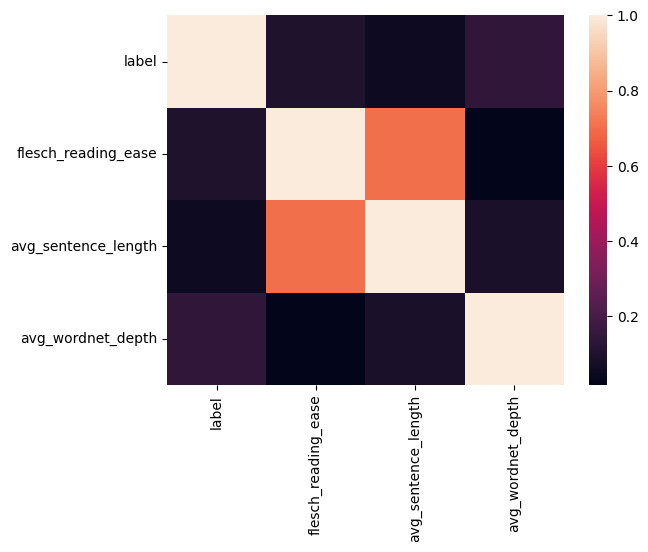

In [49]:
import seaborn as sns
sns.heatmap(abs(df_full.drop(columns=['tokenized_text']).corr()))

#EDA

look at class imbalance:

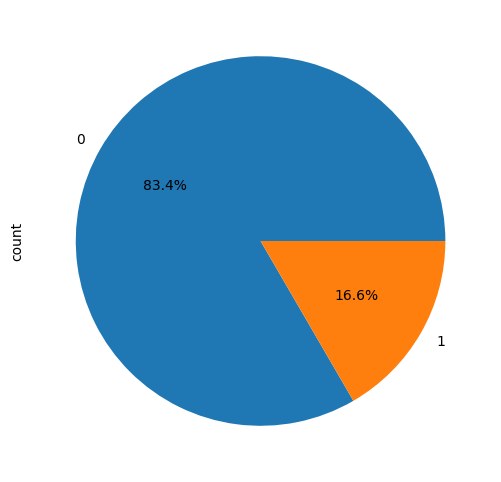

In [23]:
counts = df['label'].value_counts()

counts.plot.pie(autopct='%1.1f%%', figsize=(6, 6))
plt.show()

classes are very imbalanced - we will have to do something

some spam mail:

In [24]:
df[df['label'] == 1]['message'][:5]

,message
21,this is a multi-part message in mime format . ...
38,note : we do not wish to send e-mail to anyone...
84,"just released . . . 30 , 000 , 000 email addre..."
85,"hi , would you like to earn an extra $ 700 a w..."
86,this is really cool ! premium channels and pay...


and normal mail:

In [25]:
df[df['label'] == 0]['message'][:5]

,message
0,content - length : 3386 apple-iss research cen...
1,"lang classification grimes , joseph e . and ba..."
2,i am posting this inquiry for sergei atamas ( ...
3,a colleague and i are researching the differin...
4,earlier this morning i was on the phone with a...


simple tokenizing and cosine similarity test

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['tokenized_text'])

In [112]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering

cos_sim = cosine_similarity(X)

clustering = AgglomerativeClustering(
    n_clusters=None,
    distance_threshold=0.5,
    linkage='average'
)
labels = clustering.fit_predict(1 - cos_sim)

df['cluster'] = labels

In [113]:
df['cluster'].value_counts()[:10].index

Index([1, 59, 0, 39, 29, 191, 31, 35, 12, 64], dtype='int64', name='cluster')

In [116]:
df[df['cluster'] == 1][['tokenized_text', 'text', 'label']]

,tokenized_text,text,label
138,hi spam name matthew make habit deleting mail ...,hi this is not spam my name is matthew ...,1
278,hi spam name matthew make habit deleting mail ...,hi this is not spam my name is matthew ...,1
354,see thisi never thought one telling actually r...,you have to see thisi never thought i d be the...,1
671,extra holiday never thought one telling actual...,extra holiday i never thought i d be the o...,1
678,move bill gates subject move bill gates legal ...,move over bill gates subject move over...,1
942,please read wont regret research indicates fol...,please read you wont regret it our research i...,1
1118,success guaranteed research indicates followin...,success guaranteed our research indicates th...,1
1739,incredible opportunitydear friend received mes...,incredible opportunitydear friend if you rece...,1
1796,hard work nt pass time selected receive email ...,no hard work do nt pass it by this tim...,1
1957,home computer workers needed personal advise s...,home computer workers needed now my pe...,1


In [117]:
df[df['cluster'] == 59][['text', 'label']]

,text,label
1081,last chanceif you wish to be removed reply wi...,1
1753,re the virtual girlfriend and virtual boyfrien...,1
1961,hello there this really is a blast with all ...,1
2492,re the virtual girlfriend and virtual boyfri...,1
2529,re the virtual girlfriend and virtual boyfrien...,1
2559,re the virtual girlfriend and virtual boyfri...,1
2575,re the virtual girlfriend and virtual boyfri...,1
2598,re the virtual girlfriend and virtual boyfri...,1


In [118]:
df[df['cluster'] == 35][['text', 'label']]

,text,label
1480,press release cd vol online business go...,1
1678,now available cd vol press release our late...,1
2626,just released cd vol aonline business got yo...,1
2704,our latest greatest cd vol aonline business...,1


actually, gave rather good results - popular clusters are rather homogenous. Let's check how all are faring:

In [119]:
cluster_sizes = df.groupby('cluster').size()
df1 = cluster_sizes[cluster_sizes == 2].index

label_means = df[df['cluster'].isin(df1)].groupby('cluster')['label'].mean()

label_means[(label_means != 0) & (label_means != 1)]

,label
cluster,


also, we do not remove things like https or re on purpose - they may be useful

# Classification

##data split

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from scipy.sparse import csr_matrix

X = df_full.drop(['label'], axis=1)
y = df_full['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

vectorizer = TfidfVectorizer(max_features=10000)
# set smaller vocabulary, bigger ones proved pointless
X_vec_train = vectorizer.fit_transform(X_train['tokenized_text'])
X_vec_test = vectorizer.transform(X_test['tokenized_text'])

numeric_cols = [col for col in X.columns if col != 'tokenized_text']
X_train_numeric = csr_matrix(X_train[numeric_cols].values)
X_test_numeric = csr_matrix(X_test[numeric_cols].values)

X_train_combined = hstack([X_vec_train, X_train_numeric])
X_test_combined = hstack([X_vec_test, X_test_numeric])

In [51]:
X_train_combined.shape, X_test_combined.shape, y_train.shape, y_test.shape

((6381, 10003), (710, 10003), (6381,), (710,))

##boosting

In [52]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score


xgb = XGBClassifier(
    objective='binary:logistic', # binary classification
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=300,
    max_depth=2, # famous model - the stump forest, crazy effective sometimes
    learning_rate=0.1,
    reg_alpha=0.1, # l1
    reg_lambda=1.0, # l2
    verbosity=0
)

xgb.fit(X_train_combined, y_train)
y_pred = xgb.predict(X_test_combined)

In [53]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9985915492957746
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       522
           1       1.00      0.99      1.00       188

    accuracy                           1.00       710
   macro avg       1.00      1.00      1.00       710
weighted avg       1.00      1.00      1.00       710



99% - probably will not do better with such a small dataset

lets look at all wrong ones:

In [54]:
X_test

,tokenized_text,flesch_reading_ease,avg_sentence_length,avg_wordnet_depth
2102,From fork-admin@xent.com Mon Aug 26 15:32:06 2...,20.165458,16.212121,4.372329
3154,From info@internationalfreecall.com Mon Jun 24...,20.925981,19.363636,4.587690
1551,large corporasixth workshop large corpora augu...,-221.979576,237.000000,5.492108
1435,From rssfeeds@jmason.org Tue Sep 24 10:47:59 2...,27.650418,14.062500,5.174279
2009,cfp literature cognitive science collection li...,-130.585652,115.000000,4.168704
...,...,...,...,...
263,From spamassassin-devel-admin@lists.sourceforg...,-42.832192,20.884615,5.023462
3801,From Sidney22@webmail.co.za Wed Dec 4 11:58:35...,18.242629,23.650000,5.288973
1439,From rssfeeds@jmason.org Mon Oct 7 12:05:25 20...,32.050778,15.066667,4.801851
1870,From fork-admin@xent.com Tue Oct 1 10:41:37 20...,20.832420,16.756757,4.348844


In [55]:
results = pd.DataFrame({
    'text': X_test['tokenized_text'],
    'true': y_test,
    'pred': y_pred
})

wrong = results[results['true'] != results['pred']]
print(len(wrong))

1


In [56]:
wrong

,text,true,pred
2293,zero internet opportunity internet opportunity...,1,0


# my data

In [57]:
import tarfile

with tarfile.open('/content/test_task_emails.tar.xz') as f:
    f.extractall('.')

In [58]:
from email import policy
from email.parser import BytesParser

emails = []

folder = "ham"

for filename in os.listdir(folder):
    if filename.endswith(".eml"):
        with open(os.path.join(folder, filename), 'rb') as f:
            msg = BytesParser(policy=policy.default).parse(f)

            email_data = {
                "subject": msg["subject"],
                "from": msg["from"],
                "to": msg["to"],
                "date": msg["date"],
                "body": None
            }

            if msg.is_multipart():
                for part in msg.walk():
                    if part.get_content_type() == 'text/plain':
                        email_data["body"] = part.get_content()
                        break
            else:
                email_data["body"] = msg.get_content()

            emails.append(email_data)

ham = pd.DataFrame(emails)

In [59]:
from email import policy
from email.parser import BytesParser

emails = []

folder = "spam"

for filename in os.listdir(folder):
    if filename.endswith(".eml"):
        try:
          with open(os.path.join(folder, filename), 'rb') as f:
              msg = BytesParser(policy=policy.default).parse(f)

              email_data = {
                  "subject": msg["subject"],
                  "from": msg["from"],
                  "to": msg["to"],
                  "date": msg["date"],
                  "body": None
              }

              if msg.is_multipart():
                  for part in msg.walk():
                      if part.get_content_type() == 'text/plain':
                          email_data["body"] = part.get_content()
                          break
              else:
                  email_data["body"] = msg.get_content()

              emails.append(email_data)
        except Exception as e:
            print(filename)
            print(e)

spam = pd.DataFrame(emails)

603.eml
unknown encoding: unknown-8bit
951.eml
unknown encoding: DEFAULT_CHARSET
468.eml
'multipart/related'
617.eml
unknown encoding: DEFAULT
606.eml
unknown encoding: DEFAULT_CHARSET
484.eml
unknown encoding: DEFAULT
245.eml
unknown encoding: DEFAULT_CHARSET
201.eml
unknown encoding: charset=
832.eml
'multipart/alternative'
365.eml
unknown encoding: DEFAULT


try to fix it:

In [60]:
import os
from email import policy
from email.parser import BytesParser
from email.message import EmailMessage
import pandas as pd

def safe_get_payload(part):
    try:
        charset = part.get_content_charset()
        if charset is None:
            charset = 'utf-8'  # fallback
        return part.get_payload(decode=True).decode(charset, errors='replace')
    except Exception as e:
        return f"[error decoding part: {e}]"

def extract_email_data(path):
    with open(path, 'rb') as f:
        try:
            msg: EmailMessage = BytesParser(policy=policy.default).parse(f)
        except Exception as e:
            return {"file": path, "error": f"parse error: {e}"}

    # Basic headers
    data = {
        "file": os.path.basename(path),
        "subject": msg.get('subject'),
        "from": msg.get('from'),
        "to": msg.get('to'),
        "date": msg.get('date'),
        "body": None,
        "error": None
    }

    # Get text/plain body safely
    try:
        if msg.is_multipart():
            for part in msg.walk():
                content_type = part.get_content_type()
                disp = str(part.get('Content-Disposition'))
                if content_type == 'text/plain' and 'attachment' not in disp:
                    data["body"] = safe_get_payload(part)
                    break
        else:
            data["body"] = safe_get_payload(msg)
    except Exception as e:
        data["error"] = f"body error: {e}"

    return data

In [61]:
email_folder = "spam"
parsed_emails = []

for file in os.listdir(email_folder):
    if file.endswith(".eml"):
        email_path = os.path.join(email_folder, file)
        parsed = extract_email_data(email_path)
        parsed_emails.append(parsed)

spam = pd.DataFrame(parsed_emails)

In [62]:
ham['label'] = 0
spam['label'] = 1
new_df = pd.concat([ham, spam])

In [63]:
len(new_df)

1600

In [369]:
new_df[new_df['file'] == '603.eml']

,subject,from,to,date,body,label,file,error
179,"Free Excerpt; Baby Makers, Loser Choosers, & ...","""Books@Books""@BlackRealityPublishing.com",ports@FreeBSD.ORG,"Mon, 09 Sep 2002 17:20:53 +0000",[error decoding part: unknown encoding: unknow...,1,603.eml,None


seems fine

In [64]:
new_df = new_df.drop(['file', 'error'], axis=1)

##cleanup

In [372]:
new_df.isnull().sum()

,0
subject,3
from,1
to,44
date,1
body,151
label,0


In [374]:
new_df[new_df['body'].isnull()]['label'].value_counts()

,count
label,
1,148
0,3


since we have so many no body letters, and almost all are spam, and, due to common sense, we can say that probably there is no point in sending an email without a body (and no attachment, but we have none of that here)

In [375]:
new_df.isnull().sum()

,0
subject,3
from,1
to,44
date,1
body,151
label,0


In [65]:
new_df = new_df.fillna('')

In [377]:
new_df.isnull().sum()

,0
subject,0
from,0
to,0
date,0
body,0
label,0


In [66]:
#prep
new_df['text'] = new_df['subject'] + new_df['from'] + new_df['to'] + new_df['body']

new_df['tokenized_text'] = new_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

new_df['flesch_reading_ease'] = new_df['tokenized_text'].apply(textstat.flesch_reading_ease)
new_df['avg_sentence_length'] = new_df['tokenized_text'].apply(avg_sentence_length)
new_df['avg_wordnet_depth'] = new_df['tokenized_text'].apply(avg_wordnet_depth)

In [67]:
new_df = new_df.drop(columns=['subject', 'from', 'to', 'date', 'body', 'text'])

In [383]:
new_df

,label,tokenized_text,flesch_reading_ease,avg_sentence_length,avg_wordnet_depth
0,0,Job Offers My Resumezawodny <rssfeeds@example....,9.177000,11.200000,3.436484
1,0,[zzzzteana] Uncle Mark seeks paroleTim Chapman...,39.160636,14.263158,4.926325
2,0,Canadians - something little substantiveOwen B...,-8.861582,18.972973,4.565538
3,0,Re: The GOv gets tough Net Users.....er Pirate...,59.301475,9.777778,3.676382
4,0,da bombjwz <rssfeeds@example.com>yyyy@example....,-114.475000,13.000000,4.743590
...,...,...,...,...,...
995,1,"New Improved Fat Burners, Now With TV Fat Abso...",13.652500,10.500000,4.203571
996,1,Mortgage Rates Have Never Been Loweryyyy@netno...,53.280429,10.000000,3.617254
997,1,"re:想要致富,你還要等多久abc@ms22.hinet.net���R�W.txt@dog...",-189.508333,107.000000,7.333333
998,1,[*** POSIBLE SPAM***] Security UpdateCredit Un...,-150.175000,23.000000,7.000712


##vectorize

In [68]:
X = new_df.drop(['label'], axis=1)
y = new_df['label']

X_vec_test = vectorizer.transform(X['tokenized_text'])

numeric_cols = [col for col in X.columns if col != 'tokenized_text']
X_test_numeric = csr_matrix(X[numeric_cols].values)

X_test_combined = hstack([X_vec_test, X_test_numeric])

##boosting

In [69]:
y_pred = xgb.predict(X_test_combined)

In [70]:
print("Accuracy:", accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

Accuracy: 0.744375
              precision    recall  f1-score   support

           0       0.61      0.85      0.71       600
           1       0.88      0.68      0.77      1000

    accuracy                           0.74      1600
   macro avg       0.75      0.77      0.74      1600
weighted avg       0.78      0.74      0.75      1600



In [71]:
from sklearn.metrics import confusion_matrix
import pandas as pd

cm = confusion_matrix(y, y_pred, labels=[1, 0])
tp = cm[0, 0]
fn = cm[0, 1]
fp = cm[1, 0]
tn = cm[1, 1]

In [72]:
tp, fn, fp, tn

(np.int64(680), np.int64(320), np.int64(89), np.int64(511))

In [73]:
results = pd.DataFrame({
    'true': y.reset_index(drop=True),
    'pred': y_pred
})

X_test_reset = X.reset_index(drop=True)

results = pd.concat([results, X_test_reset], axis=1)

wrong = results[results['true'] != results['pred']]
print(len(wrong))

409


In [74]:
fp = wrong[(wrong['true'] == 0) & (wrong['pred'] == 1)]
fn = wrong[(wrong['true'] == 1) & (wrong['pred'] == 0)]

In [76]:
len(fp), len(fn)

(89, 320)

In [85]:
fp['tokenized_text'][1]

'[zzzzteana] Uncle Mark seeks paroleTim Chapman <timc@2ubh.com>zzzzteana <zzzzteana@yahoogroups.com>http://news.bbc.co.uk/1/hi/entertainment/showbiz/2308581.stm Tuesday, 8 October, 2002, 07:55 GMT 08:55 UK Lennon killer seeks parole The man shot dead former Beatle John Lennon making another bid early release prison - day would Lennon\'s 62nd birthday. Mark David Chapman, 47, jailed life admitted killing superstar outside New York apartment building 1980. It second time two years Chapman sought parole Attica state prison. At 2000 hearing, argued longer danger society overcome psychological problems led shoot ex-Beatle. Chapman said voice head told shoot star. Shot dead Lennon shot four times emerged limousine outside New York City apartment 8 December 1980. He wife Yoko Ono returning late-night recording session time working Walking Thin Ice. Only hours shooting, Chapman - come New York Hawaii - photographed singer outside building Lennon signed copy album Double Fantasy him. The killer

In [95]:
fn['tokenized_text'][613]

"[ILUG-Social] Head & Rotor VE 07/26diesel fuel injection <china_lutong@163.com>social@linux.ieDear Sir, *¡°ÖÐÂ·Í¨Åä¼þ³§¡±×¨ÒµÉú²úVE±ÃÍ·(VE·ÖÅä±Ã±ÃÍ·×Ü³É),Ö÷ÒªÐÍºÅÓÐ ÎåÊ®Áå4JB1,¿µÃ÷Ë¹6BT,ÒÀÎ¬¿ÂµÍÅÅ·Å,ÎåÊ®ÁäÆ¤¿¨..... * ÖÐÂ·Í¨Åä¼þ³§ÓÐ¶àÄêÉú²úVE±ÃÍ·µÄ¾\xadÑé, ×÷Îª½ÏÔç½øÈëÓÍ±ÃÓÍ×ìÐÐ ÒµµÄ×¨Òµ³§,ÎÒÃÇÊ±¿Ì¸ú×Ù¹ú¼Ê¸÷µØÆäËü²ñÓÍÈ¼ÓÍÅçÉäÏµÍ³µÄÖÆ ÔìÉÌµÄÉú²ú¹¤ÒÕ,²¢ÇÒ²»¶ÏÎüÊÕ¹ú¼ÊÉÏ×îÏÈ½øµÄ¼Ó¹¤,²âÊÔ¹¤.²úÆ·µÄ ÖÊÁ¿ºÍÍâ¹ÛÍ¬¹úÍâÍ¬Àà²úÆ·Ïàµ±. * Èç¶ÔÎÒÃÇµÄ²úÆ·¸ÐÐËÈ¤,ÇëÍ¨ÖªÎÒÃÇ. field diesel fuel injection systems quite years.(CHINA) We tell update VE h&r (hydraulic heads VE distributor pump) list homepages.Thirty models added.And minimum order 6pcs model.We quote follows: 3-cyl:USD:50/1pcs 4-cyl:USD:50/1pcs 5-cyl:USD:55/1pcs 6-cyl:USD:55/1pcs We ship following three models within 8~10 weeks. receive payment. If feel interested products,please advise details need,such model name,part number,quantity on.We always within touch. Looking forward favorable cooperation. Hope hear soon. (NIPPON DENSO) 096400-0920 0